Importación del conjunto de datos y visualización.

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos
data = pd.read_csv('csv/synthetic_data1.csv')

# Visualizar los primeros registros
data.head()

,x,y
0,7.933768,3.681179
1,4.760600,7.518566
2,2.257447,1.617497
3,2.960558,1.805772
4,1.582530,1.588611


In [53]:
# Crear un array con los datos
X = data.values

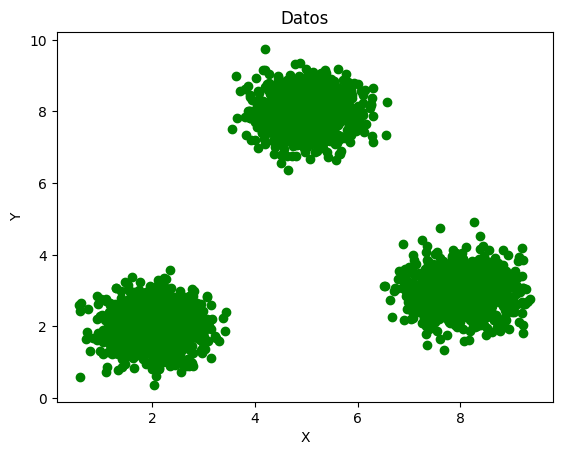

In [54]:
# Mostramos los datos
plt.plot(X[:, 0], X[:, 1], color='green', marker='o', linestyle='None')
plt.title("Datos")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Averigua el número de clusters óptimo utilizando Elbow y BIC.

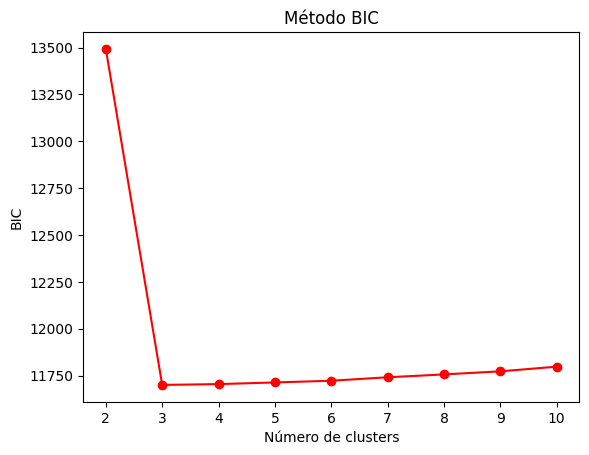

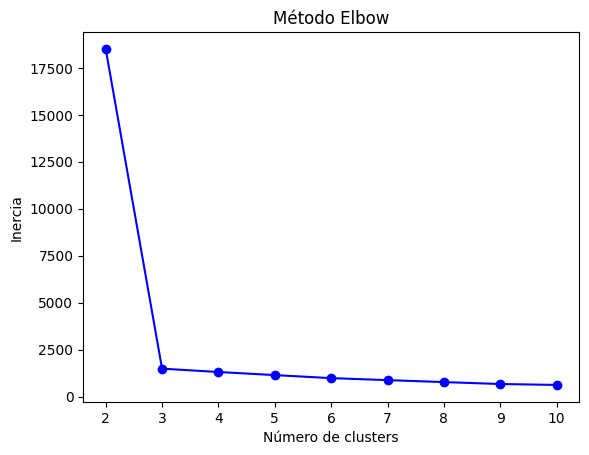

In [55]:
import numpy as np
from sklearn.cluster import KMeans

# Función para calcular el índice BIC
def BIC(K, grupos, X):
    N = X.shape[0]  # Número de datos
    P = X.shape[1]  # Número de variables
    xi = np.zeros((1, K))  # Vector xi

    # Calcula el sumatorio de xi en la fórmula
    for k in range(0, K):
        suma = 0
        for j in range(0, P):
            sigma = np.square(np.std(X[:, j]))
            sigma_j = np.square(np.std(X[grupos == k, j]))
            suma += 0.5 * np.log(sigma + sigma_j)

        n_k = sum(grupos == k)  # Número de elementos en el grupo k
        xi[0, k] = -n_k * suma

    bic = -2 * np.sum(xi) + 2 * K * P * np.log(N)
    return bic

# Encuentra el número óptimo de clusters utilizando Elbow y BIC
Kmax = 10
inercias = []
bics = []

for k in range(2, Kmax + 1):
    kmeans = KMeans(n_clusters=k, random_state=10, n_init=10)
    kmeans.fit(X)
    grupos = kmeans.predict(X)
    inercias.append(kmeans.inertia_)
    bics.append(BIC(k, grupos, X))
    
# Muestra los resultados
# Graficar BIC
plt.plot(range(2, Kmax + 1), bics, color='red', marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('BIC')
plt.title('Método BIC')
plt.show()

# Graficar Elbow
plt.plot(range(2, Kmax + 1), inercias, color='blue', marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método Elbow')
plt.show()

K-means con el número de clusters óptimo.

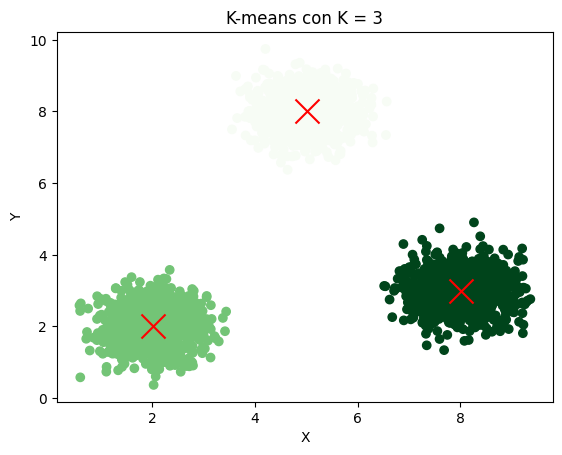

In [56]:
# Número óptimo de clusters
K = 3

# Entrenar el modelo
kmeans = KMeans(n_clusters=K, random_state=10, n_init=10)
kmeans.fit(X)

# Predecir los clusters
grupos = kmeans.predict(X)

# Mostrar los clusters
plt.scatter(X[:, 0], X[:, 1], c=grupos, cmap='Greens')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x')
plt.title("K-means con K = " + str(K))
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Comprueba si este resultado coincide con la agrupación real que puedes encontrar en el fichero synthetic_data1_with_labels.csv. 

In [57]:
# Cargar datos
data_with_labels = pd.read_csv('csv/synthetic_data1_with_labels.csv')

# Visualizar los primeros registros
data_with_labels.head()

,x,y,class
0,7.933768,3.681179,2.0
1,4.760600,7.518566,3.0
2,2.257447,1.617497,1.0
3,2.960558,1.805772,1.0
4,1.582530,1.588611,1.0


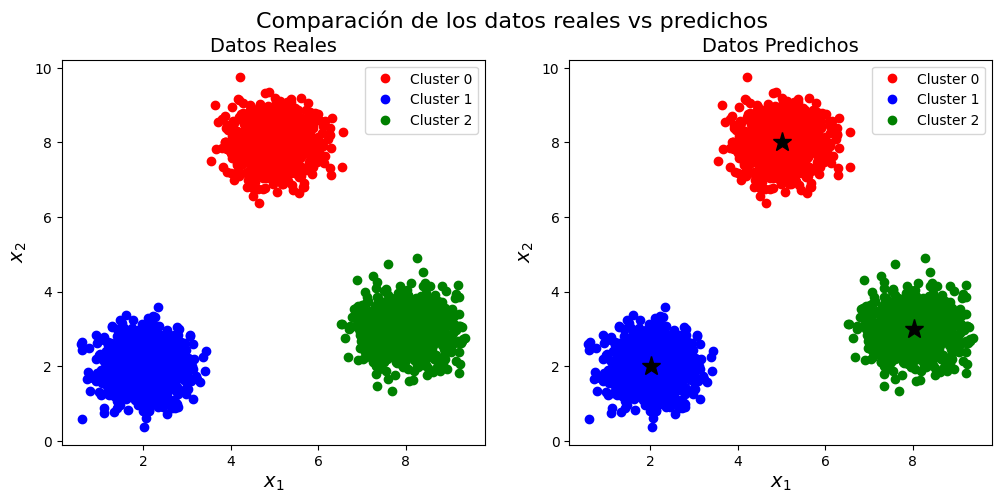

In [59]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 5)
fig.suptitle('Comparación de los datos reales vs predichos', fontsize=16)

ax1.plot(X_with_labels[X_with_labels[:,2] == 3, 0],
         X_with_labels[X_with_labels[:,2] == 3, 1], 'ro', label="Cluster 0")
ax1.plot(X_with_labels[X_with_labels[:,2] == 1, 0],
         X_with_labels[X_with_labels[:,2] == 1, 1], 'bo', label="Cluster 1")
ax1.plot(X_with_labels[X_with_labels[:,2] == 2, 0],
         X_with_labels[X_with_labels[:,2] == 2, 1], 'go', label="Cluster 2")
ax1.legend()
ax1.set_title("Datos Reales", fontsize=14)
ax1.set_xlabel(r"$x_1$", fontsize=14)
ax1.set_ylabel(r"$x_2$", fontsize=14)

ax2.plot(X[grupos == 0, 0], X[grupos == 0, 1], 'ro', label="Cluster 0")
ax2.plot(X[grupos == 1, 0], X[grupos == 1, 1], 'bo', label="Cluster 1")
ax2.plot(X[grupos == 2, 0], X[grupos == 2, 1], 'go', label="Cluster 2")
ax2.plot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 'k*', markersize=14)
ax2.legend()
ax2.set_title("Datos Predichos", fontsize=14)
ax2.set_xlabel(r"$x_1$", fontsize=14)
ax2.set_ylabel(r"$x_2$", fontsize=14)

plt.show()